In [470]:
!pip install selenium

In [471]:
from selenium import webdriver  
from selenium.common.exceptions import NoSuchElementException  
import time  
import re  

In [472]:
from bs4 import BeautifulSoup
import pandas as pd

In [473]:
def scrape_one_page(url):
    browser = webdriver.Chrome()
    browser.get(url)
    time.sleep(2)
    board=browser.find_elements_by_class_name('zg_itemRow')  
    items = []
    for row in board:
        item = {}
        item['No.'] = row.find_element_by_class_name('zg_rankNumber').text
        item['title'] = row.find_element_by_class_name('p13n-sc-truncated').text
        item['author'] = row.find_element_by_class_name('a-row').text
        item['type'] = row.find_element_by_css_selector('span.a-size-small.a-color-secondary').text
        try:
            item['price'] = row.find_element_by_class_name('p13n-sc-price').text.split('￥')[1]
        except:
            item['price'] = '-1'
        items.append(item)
    return items

In [474]:
all_page_items = []
for i in range(1,6):
    url = 'https://www.amazon.cn/gp/bestsellers/books#%s' % i
    new_items = scrape_one_page(url)
    all_page_items.extend(new_items)
    print(all_page_items)

[{'No.': '1.', 'title': '原则(简体中文版)', 'author': '瑞·达利欧', 'type': '精装', 'price': '63.00'}, {'No.': '2.', 'title': '我的第一本专注力训练书（专注的孩子更聪明）', 'author': '美国迪士尼公司', 'type': '平装', 'price': '29.70'}, {'No.': '3.', 'title': '高兴死了!!!', 'author': '珍妮•罗森(Jenny Lawson)', 'type': '平装', 'price': '44.54'}, {'No.': '4.', 'title': '高难度沟通:麻省理工高人气沟通课', 'author': '贾森·杰伊', 'type': '平装', 'price': '32.44'}, {'No.': '5.', 'title': '三体(1-3)(套装共3册)', 'author': '刘慈欣', 'type': '平装', 'price': '64.20'}, {'No.': '6.', 'title': '影响力(经典版)', 'author': '罗伯特·B.西奥迪尼', 'type': '平装', 'price': '38.80'}, {'No.': '7.', 'title': '解忧杂货店', 'author': '东野圭吾', 'type': '精装', 'price': '30.20'}, {'No.': '8.', 'title': '房思琪的初恋乐园', 'author': '林奕含', 'type': '平装', 'price': '32.88'}, {'No.': '9.', 'title': '慢煮生活', 'author': '汪曾祺', 'type': '精装', 'price': '34.24'}, {'No.': '10.', 'title': '自控力(斯坦福大学广受欢迎心理学课程)', 'author': '凯利·麦格尼格尔', 'type': '平装', 'price': '32.40'}, {'No.': '11.', 'title': '我们仨', 'author': '杨绛', 'type': '平装', 'price': '18.90'}, 

[{'No.': '1.', 'title': '原则(简体中文版)', 'author': '瑞·达利欧', 'type': '精装', 'price': '63.00'}, {'No.': '2.', 'title': '我的第一本专注力训练书（专注的孩子更聪明）', 'author': '美国迪士尼公司', 'type': '平装', 'price': '29.70'}, {'No.': '3.', 'title': '高兴死了!!!', 'author': '珍妮•罗森(Jenny Lawson)', 'type': '平装', 'price': '44.54'}, {'No.': '4.', 'title': '高难度沟通:麻省理工高人气沟通课', 'author': '贾森·杰伊', 'type': '平装', 'price': '32.44'}, {'No.': '5.', 'title': '三体(1-3)(套装共3册)', 'author': '刘慈欣', 'type': '平装', 'price': '64.20'}, {'No.': '6.', 'title': '影响力(经典版)', 'author': '罗伯特·B.西奥迪尼', 'type': '平装', 'price': '38.80'}, {'No.': '7.', 'title': '解忧杂货店', 'author': '东野圭吾', 'type': '精装', 'price': '30.20'}, {'No.': '8.', 'title': '房思琪的初恋乐园', 'author': '林奕含', 'type': '平装', 'price': '32.88'}, {'No.': '9.', 'title': '慢煮生活', 'author': '汪曾祺', 'type': '精装', 'price': '34.24'}, {'No.': '10.', 'title': '自控力(斯坦福大学广受欢迎心理学课程)', 'author': '凯利·麦格尼格尔', 'type': '平装', 'price': '32.40'}, {'No.': '11.', 'title': '我们仨', 'author': '杨绛', 'type': '平装', 'price': '18.90'}, 

In [475]:
all_page_items

[{'No.': '1.',
  'author': '瑞·达利欧',
  'price': '63.00',
  'title': '原则(简体中文版)',
  'type': '精装'},
 {'No.': '2.',
  'author': '美国迪士尼公司',
  'price': '29.70',
  'title': '我的第一本专注力训练书（专注的孩子更聪明）',
  'type': '平装'},
 {'No.': '3.',
  'author': '珍妮•罗森(Jenny Lawson)',
  'price': '44.54',
  'title': '高兴死了!!!',
  'type': '平装'},
 {'No.': '4.',
  'author': '贾森·杰伊',
  'price': '32.44',
  'title': '高难度沟通:麻省理工高人气沟通课',
  'type': '平装'},
 {'No.': '5.',
  'author': '刘慈欣',
  'price': '64.20',
  'title': '三体(1-3)(套装共3册)',
  'type': '平装'},
 {'No.': '6.',
  'author': '罗伯特·B.西奥迪尼',
  'price': '38.80',
  'title': '影响力(经典版)',
  'type': '平装'},
 {'No.': '7.',
  'author': '东野圭吾',
  'price': '30.20',
  'title': '解忧杂货店',
  'type': '精装'},
 {'No.': '8.',
  'author': '林奕含',
  'price': '32.88',
  'title': '房思琪的初恋乐园',
  'type': '平装'},
 {'No.': '9.',
  'author': '汪曾祺',
  'price': '34.24',
  'title': '慢煮生活',
  'type': '精装'},
 {'No.': '10.',
  'author': '凯利·麦格尼格尔',
  'price': '32.40',
  'title': '自控力(斯坦福大学广受欢迎心理学课程)',
  'type'

In [476]:
import csv
with open('Amazonbestbooks_all.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(all_page_items)

In [477]:
df = pd.DataFrame(all_page_items)

In [478]:
df

,No.,author,price,title,type
0,1.,瑞·达利欧,63.00,原则(简体中文版),精装
1,2.,美国迪士尼公司,29.70,我的第一本专注力训练书（专注的孩子更聪明）,平装
2,3.,珍妮•罗森(Jenny Lawson),44.54,高兴死了!!!,平装
3,4.,贾森·杰伊,32.44,高难度沟通:麻省理工高人气沟通课,平装
4,5.,刘慈欣,64.20,三体(1-3)(套装共3册),平装
5,6.,罗伯特·B.西奥迪尼,38.80,影响力(经典版),平装
6,7.,东野圭吾,30.20,解忧杂货店,精装
7,8.,林奕含,32.88,房思琪的初恋乐园,平装
8,9.,汪曾祺,34.24,慢煮生活,精装
9,10.,凯利·麦格尼格尔,32.40,自控力(斯坦福大学广受欢迎心理学课程),平装


<font size=5> 1.TOP 10 books people like to buy from amazon.cn:

In [479]:
df.head(10)

,No.,author,price,title,type
0,1.,瑞·达利欧,63.00,原则(简体中文版),精装
1,2.,美国迪士尼公司,29.70,我的第一本专注力训练书（专注的孩子更聪明）,平装
2,3.,珍妮•罗森(Jenny Lawson),44.54,高兴死了!!!,平装
3,4.,贾森·杰伊,32.44,高难度沟通:麻省理工高人气沟通课,平装
4,5.,刘慈欣,64.20,三体(1-3)(套装共3册),平装
5,6.,罗伯特·B.西奥迪尼,38.80,影响力(经典版),平装
6,7.,东野圭吾,30.20,解忧杂货店,精装
7,8.,林奕含,32.88,房思琪的初恋乐园,平装
8,9.,汪曾祺,34.24,慢煮生活,精装
9,10.,凯利·麦格尼格尔,32.40,自控力(斯坦福大学广受欢迎心理学课程),平装


<font size=5>2.People's preference on hardcovers and paperbacks:

In [495]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

In [496]:
types=df['type']=='精装'

In [497]:
types.value_counts()

False    73
True     27
Name: type, dtype: int64

In [498]:
labels = '精装', '平装'
fracs = [27, 73]

In [484]:
from matplotlib.font_manager import FontProperties

font = FontProperties(fname='/System/Library/Fonts/msyh.ttf')

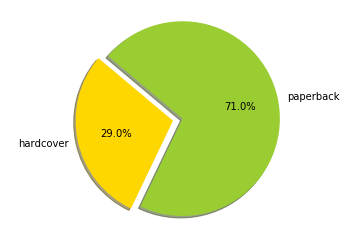

In [485]:
df['type'].value_counts()

labels = 'hardcover', 'paperback'
sizes = [27,73]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

<font size=5>3.Somthing was found from 'price' iterm:

1)By 6:59 p.m. on April 10th, 2017, the minimum and the maximum price of best seller books are ¥12.3 named "儿童情绪与人格培养绘本:我要更勇敢(中英对照)" and ¥241 named "哈利·波特(纪念版)(套装共7册)" respectively.

In [486]:
prices=df['price']

In [487]:
book_price = []
for i in range(0,len(prices)):
    if float(prices[i])>= 0:
        book_price.append(float(prices[i]))

In [488]:
df2 = pd.DataFrame(book_price)
df2

,0
0,63.00
1,29.70
2,44.54
3,32.44
4,64.20
5,38.80
6,30.20
7,32.88
8,34.24
9,32.40


In [489]:
df2.min()

0    12.3
dtype: float64

In [490]:
df2.max()

0    241.0
dtype: float64

In [491]:
df[df['price']=='241.00']

,No.,author,price,title,type
93,94.,罗琳,241.00,哈利·波特(纪念版)(套装共7册),平装


In [492]:
df[df['price']=='12.30']

,No.,author,price,title,type
44,45.,芭芭拉凯因(Barbara Cain),12.30,儿童情绪与人格培养绘本:我要更勇敢(中英对照),平装


2)Most prices of best seller books are lower than ¥40, which shows that people may tend to buy cheaper ones online.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1abbef2e8>]],
      dtype=object)

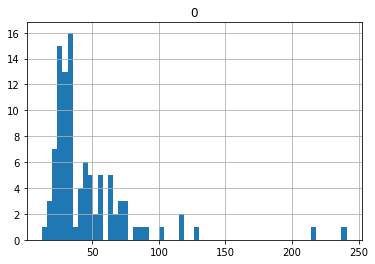

In [493]:
df2.hist(bins=60)

3)The price of books is not related to the ranking. For the most expensive three books, two of them are top-60 books    but the most expensive one is near the lowest rank.

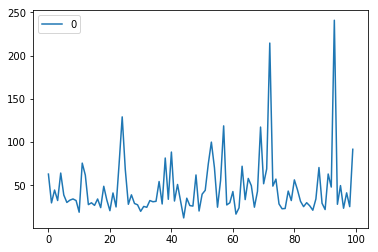

In [494]:
df2.plot()